# Write a code that read from a text the frequency of letter of the alphabet than plot them to compare the results

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rc


# Global definition of matplotlib plots appearance
# commands behavior should be straightforward
# comments when needed

plt.rcParams['mathtext.default']= 'regular'
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams["axes.labelpad"]=10   # axes labels distance from tick labels
plt.rcParams["axes.titlesize"] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 150

In [13]:
import string

def countLetters(fname=None,debug=False):
    _dict = {}
    if fname is None: fname = 'data/OldEnglish_text.txt'
    if fname != '':
        if fname == 'na na boo boo': 
            print("NA NA BOO BOO TO YOU - You have been punk'd!") # This is an Easter Egg
        try : 
            FILE = open(fname,mode='r') # open the FILE into an handle
            for line in FILE:
                words = line.split()
                for wds in words :
                    if debug : print ('Debug:', words)
                    for let in wds.lower() :
                        if let not in string.punctuation and let.isalpha():
                            if let not in _dict:
                                _dict[let] = 1
                            else:
                                _dict[let] += 1
            return _dict
        except FileNotFoundError :
            print('\n')
            print('File with name %s not found'%('data/'+fname))
            return
    else : 
        print('\n')
        print('An empty file name is not a valid input')
        return
    
def dictMax(_dict,reverse=True,sort_only=False,valfirst=True):
    if valfirst :
        lst = sorted([(_val,_key) for _key,_val in list(_dict.items())], reverse=reverse)
    else :
        lst = sorted([(_key,_val) for _key,_val in list(_dict.items())], reverse=reverse)
    if sort_only:
        return lst        
    print('Most messages for address %s with %g messages'%(lst[0][1],lst[0][0]))

In [14]:
def FILEname(_dir):
    import subprocess
    fname = subprocess.run(['ls', _dir], 
                          stdout=subprocess.PIPE).stdout.decode('utf-8')
    return fname.split('\n')[:-1]

def sumdictvalues(_dict1,_dict2):
    if _dict1.keys() == _dict2.keys(): 
        for _key in _dict1.keys():
            _dict1[_key] += _dict2[_key]
    return _dict1

In [15]:
langfreq = {}

for lang in FILEname('data/mass-dataset/dataset/'):
    if lang == 'russian' : continue
    fdir = 'data/mass-dataset/dataset/'+lang+'/raw_txt/'
    _files = FILEname(fdir)
    for ind,ff in enumerate(_files):
        if ind > 0:
            dd = countLetters(fdir+ff)
            d = sumdictvalues(d,dd)
        else:
            d = countLetters(fdir+ff)
    _d = [(i,round(j/sum(d.values())*100,1)) for i,j in list(d.items())]
    langfreq[lang] = dict(_d)

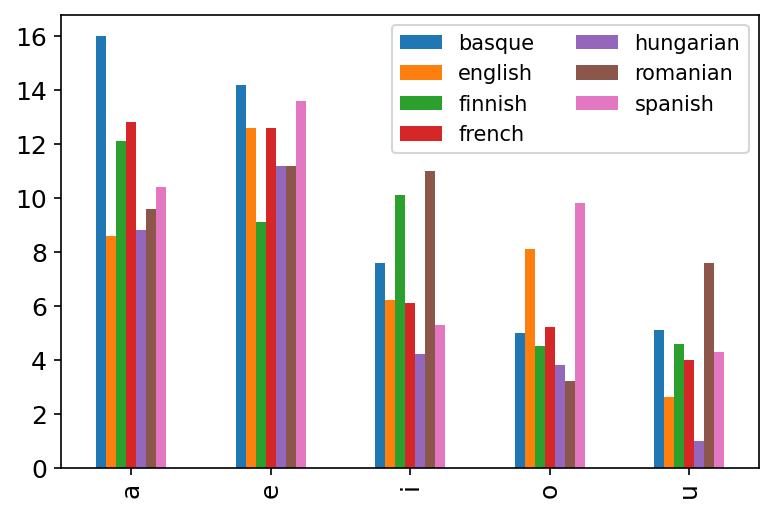

In [59]:
import pandas as pd
d=countLetters('data/OldEnglish_text.txt')

df = pd.DataFrame.from_dict(langfreq,orient='index').fillna(0)
ndf = df[['a','e','i','o','u']]

ndf.T.plot(kind='bar')
plt.legend(ncol=2)